In [1]:
import pandas as pd
from textblob.classifiers import NaiveBayesClassifier
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from nltk.corpus import stopwords

In [3]:
#reading data
data = pd.read_csv("C:\\Users\\Praveen Kumar\\Desktop\\pascolan\\data.csv")

In [4]:
dt.head(5)

,Category,Question,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2.0,क्या बीजेपी को प्रियंका की टक्कर में वरुण गांध...,NaN,NaN,NaN,NaN,NaN
1,2.0,Narander modi ji ka speech aapko ksa lgta h ?,NaN,NaN,NaN,NaN,NaN
2,2.0,क्या ममता बनर्जी को धरने में बैठने से कोई फायद...,NaN,NaN,NaN,NaN,NaN
3,2.0,भारत की राजनीति में सबसे घटिया आदमी कौन है ?,NaN,NaN,NaN,NaN,NaN
4,2.0,अरविंद केजरीवाल को प्रधानमंत्री मोदी इतने बुरे...,NaN,NaN,NaN,NaN,NaN


In [5]:
data1 = data.iloc[:,0:2]

In [6]:
data1.head(5)

,Category,Question
0,2.0,क्या बीजेपी को प्रियंका की टक्कर में वरुण गांध...
1,2.0,Narander modi ji ka speech aapko ksa lgta h ?
2,2.0,क्या ममता बनर्जी को धरने में बैठने से कोई फायद...
3,2.0,भारत की राजनीति में सबसे घटिया आदमी कौन है ?
4,2.0,अरविंद केजरीवाल को प्रधानमंत्री मोदी इतने बुरे...


In [7]:
#removing null values

dt2 = data1.dropna(axis = 0, how ='any')
dt2.isna().sum()

Category    0
Question    0
dtype: int64

In [8]:
# manupulating Category column in data set

dt2['Category'] = np.where(dt2['Category']==2.0, 'Politics', 'Technology')


D:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [78]:
dt2['Category'].count()

368

In [83]:
from collections import Counter
categories = []

for w in range(len(dt2)):
    categories.append(dt2['Category'][w])

#words = ['a', 'b', 'c', 'a']

Counter(categories).keys() # equals to list(set(words))


dict_keys(['Politics', 'Technology'])

In [84]:
Counter(categories).values() # counts the elements' frequency

dict_values([298, 70])

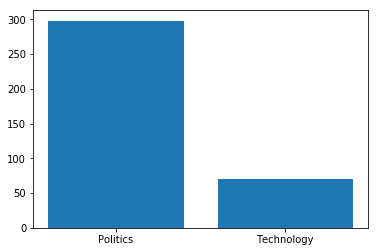

In [87]:
# Bar chart on Categories

import numpy as np
import matplotlib.pyplot as plt
 

height = [298,70]
bars = ('Politics','Technology')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()


In [ ]:
label = ['Politics','Technology']
numbers = []

In [88]:
dt2.head()

,Category,Question
0,Politics,क्या बीजेपी को प्रियंका की टक्कर में वरुण गांध...
1,Politics,Narander modi ji ka speech aapko ksa lgta h ?
2,Politics,क्या ममता बनर्जी को धरने में बैठने से कोई फायद...
3,Politics,भारत की राजनीति में सबसे घटिया आदमी कौन है ?
4,Politics,अरविंद केजरीवाल को प्रधानमंत्री मोदी इतने बुरे...


In [11]:
# Reading an excel file using Python 
import xlrd 
  
loc = ("C:\\Users\\Praveen Kumar\\Desktop\\pascolan\\pp.xlsx") 
wb = xlrd.open_workbook(loc) 
sheet = wb.sheet_by_index(0) 

sheet.cell_value(0, 0)

In [92]:
# stopwords saving in list format

stopwords = []
for x in range(96):
    stopwords.append(sheet.cell_value((x+1), 0))
    
stopwords[:30]


['का',
 'एक',
 'में',
 'की',
 'है',
 'यह',
 'और',
 'से',
 'हैं',
 'को',
 'पर',
 'इस',
 'होता',
 'कि',
 'जो',
 'कर',
 'मे',
 'गया',
 'करने',
 'किया',
 'लिये',
 'अपने',
 'ने',
 'बनी',
 'नहीं',
 'तो',
 'ही',
 'या',
 'एवं',
 'दिया']

In [57]:
# Removing Stop words

from nltk.text import Text


In [74]:
#function to remove stop words
def rmstopwords(x):
    if x not in stopwords:
        return x
    


In [76]:
# removing stop words
for x in range(len(dt2)):
    dt2['Question'][x] = rmstopwords(dt2['Question'][x])




In [14]:
# saving the data in list format

l = []
for x in range(len(dt2)):
    l.append((dt2['Question'][x],dt2['Category'][x]))
    

In [15]:
# using NaiveBayesClassifier to classify the data

cl = NaiveBayesClassifier(l)

In [16]:
# testing the algorithm

print(cl.classify("भारत में सबसे ज्यादा पापुलर हीरो कोन है ?"))

Technology


In [17]:
# checking how many are not predicted correctly

for x in range(len(dt2)):
    if cl.classify(dt2['Question'][x]) != dt2['Category'][x]:
        print(dt2['Question'][x])

मनोरंजन क्यों आवश्यक है ? ?
बोदूजी की लुगाई कब आएगी ?


In [18]:
# saving the predicted value in list format

predicted = []
actual_value = []
target_names = ['Politics_value', 'Technology_value']
for x in range(len(dt2)):
    predicted.append(cl.classify(dt2['Question'][x]))
    actual_value.append(dt2['Category'][x])

In [19]:
# checking the result finally

print(classification_report(predicted,actual_value, target_names=target_names))

                  precision    recall  f1-score   support

  Politics_value       1.00      0.99      1.00       300
Technology_value       0.97      1.00      0.99        68

       micro avg       0.99      0.99      0.99       368
       macro avg       0.99      1.00      0.99       368
    weighted avg       0.99      0.99      0.99       368

